In [105]:
import pandas as  pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from google.colab import drive


In [106]:
drive.mount('/content/drive')
df= pd.read_csv (r"/content/drive/MyDrive/CustomerChurn_dataset.csv")

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [107]:

#Checking there are missing values in there
print(df.isnull().sum())

# There are no  missing values in the dataset  I felt there is no need
# calculating for the 30% missing values since that will produce the same value of zeros


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [108]:
# Removing the column titled CustomerID since it's an ID and I think it will not  be relevant
df.drop(columns='customerID', inplace=True)


Feature enginneering and preprocessing

In [109]:

# Separate the numerical and categorical columns
numerical_column = df.select_dtypes(include=['number'])
numerical_column .info(verbose=True)
categorical_column = df.select_dtypes(exclude=['number'])
categorical_column.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9  

In [125]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Assuming categorical_column is your DataFrame
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column in the imputed categorical data
for col in categorical_column.columns:
    categorical_column[col] = label_encoder.fit_transform(categorical_column[col])

# Save the fitted label encoder using pickle
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

# To download the file in Google Colab
from google.colab import files

files.download('label_encoder.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:

# Combine the DataFrame
df_combined =pd.concat([numerical_column,categorical_column],axis=1)

# Display the updated DataFrame
df_combined.head()


,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,0,34,56.95,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,0,2,53.85,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,0,45,42.30,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,2,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


In [36]:
# Split target and feature variables
Y = df_combined['Churn']
X = df_combined.drop('Churn',axis=1)

In [112]:

# Create a RandomForestClassifier model
the_model = RandomForestClassifier()

# Train the model on the training data
the_model.fit(X, Y)


RandomForestClassifier()

In [47]:
#  Getting important features in the dataset
feature = X.columns
feature_importance =the_model.feature_importances_

# Sorting the feature importance
feature_importance_data = pd.DataFrame({'The Feature': feature, 'Importance': feature_importance})

# Sorting the features in descending order
feature_importance_data= feature_importance_data.sort_values(by='Importance', ascending=False)
feature_importance_data

,The Feature,Importance
1,tenure,0.178840
2,MonthlyCharges,0.174685
18,TotalCharges,0.167994
15,Contract,0.074413
17,PaymentMethod,0.051870
9,OnlineSecurity,0.049738
12,TechSupport,0.044324
8,InternetService,0.029261
3,gender,0.028157
10,OnlineBackup,0.026083


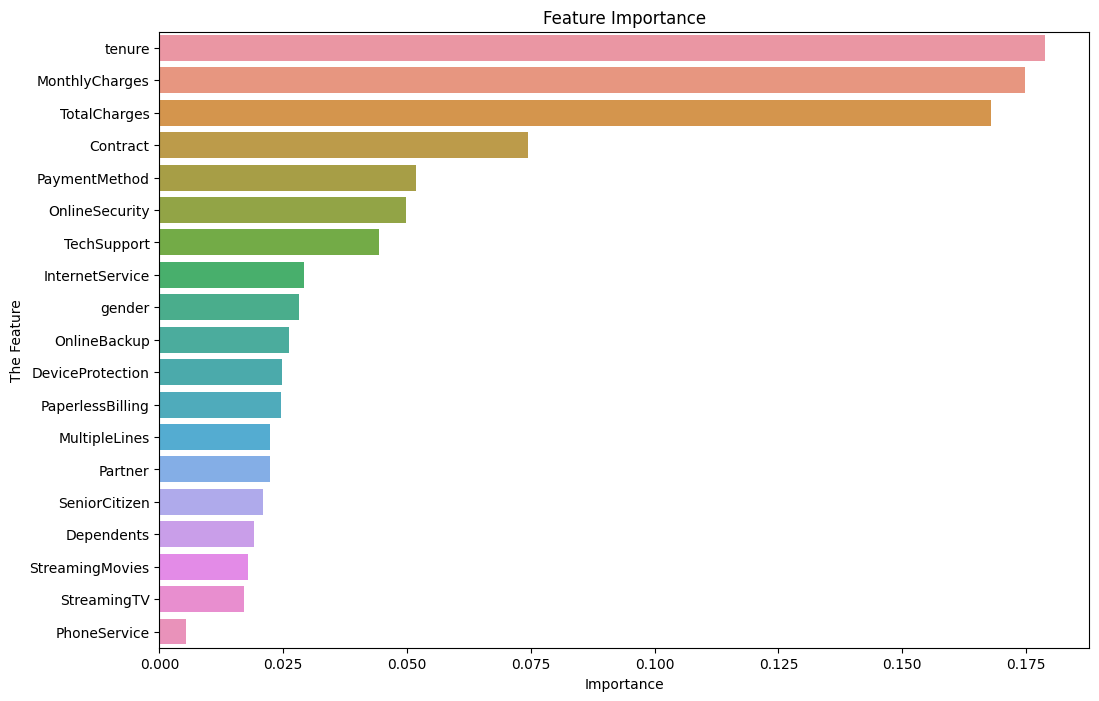

In [116]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for feature importance
sns.barplot(x='Importance', y='The Feature', data=feature_importance_data)

# Set axis labels and title
plt.xlabel('Importance')
plt.title('Feature Importance')

# Show the plot
plt.show()



In [52]:
#selecting the top 10 feature
top_features = feature_importance_data['The Feature'].values[:10]
top_features

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'PaymentMethod', 'OnlineSecurity', 'TechSupport',
       'InternetService', 'gender', 'OnlineBackup'], dtype=object)

In [54]:

# Scaling the data values for training
scaled =StandardScaler()
scaled_data = scaled.fit_transform(X)

# Transform it into a dataframe
newData= pd.DataFrame(scaled_data, columns=X.columns)
newData.head()

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,-0.439916,-1.277445,-1.160323,-1.009559,1.034530,-0.654012,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-0.398608
1,-0.439916,0.066327,-0.259629,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.948762
2,-0.439916,-1.236724,-0.362660,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-1.641883
3,-0.439916,0.514251,-0.746535,0.990532,-0.966622,-0.654012,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.983710
4,-0.439916,-1.236724,0.197365,-1.009559,-0.966622,-0.654012,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.235224


In [114]:
# Convert 'TotalCharges' column to numeric values, handling errors by converting them to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


EXPLANATORY DATA ANALYSIS

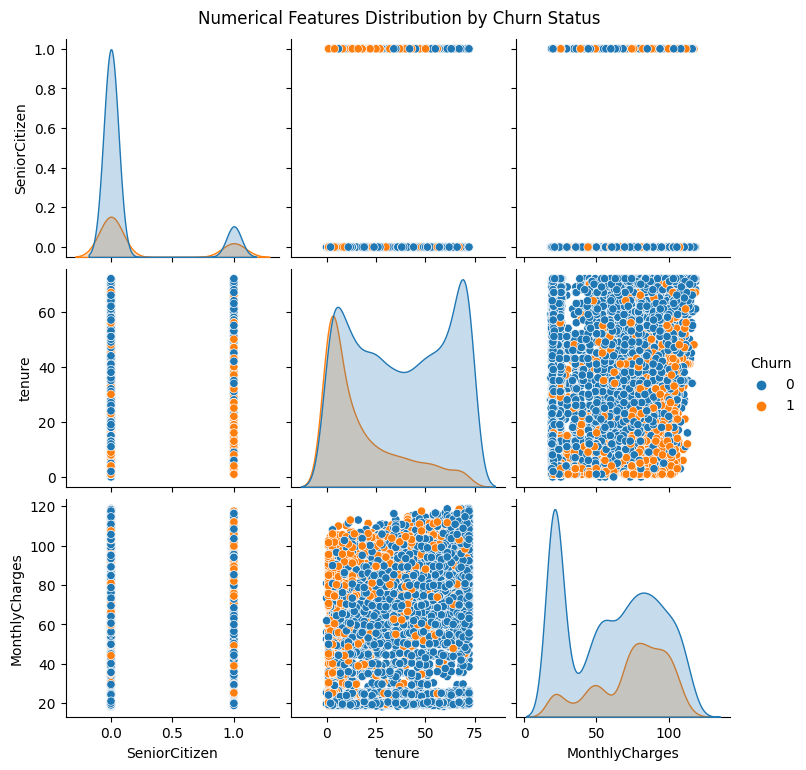

In [120]:
# Plot numerical features distribution based on Churn
num_features = numerical_column.tolist() + ['Churn']
sns.pairplot(df_combined[num_features], hue='Churn', diag_kind='kde')
plt.suptitle('Numerical Features Distribution by Churn Status', y=1.02)
plt.show()





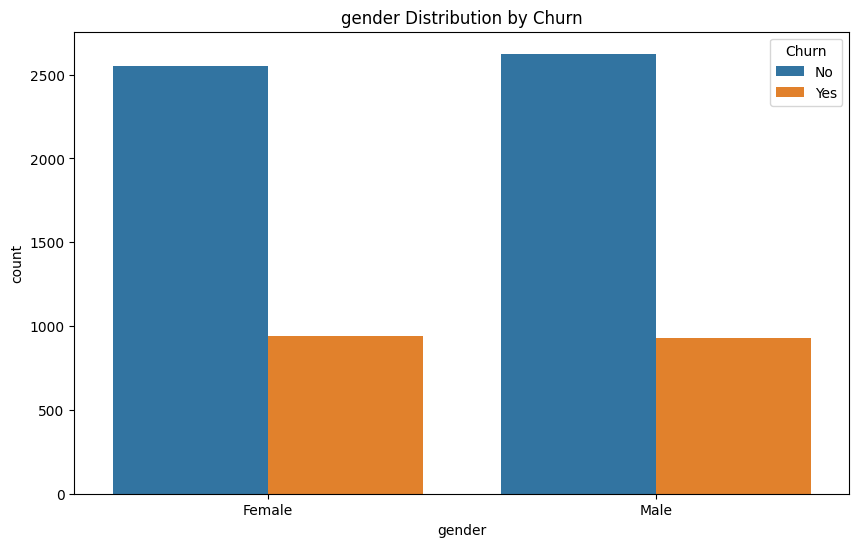

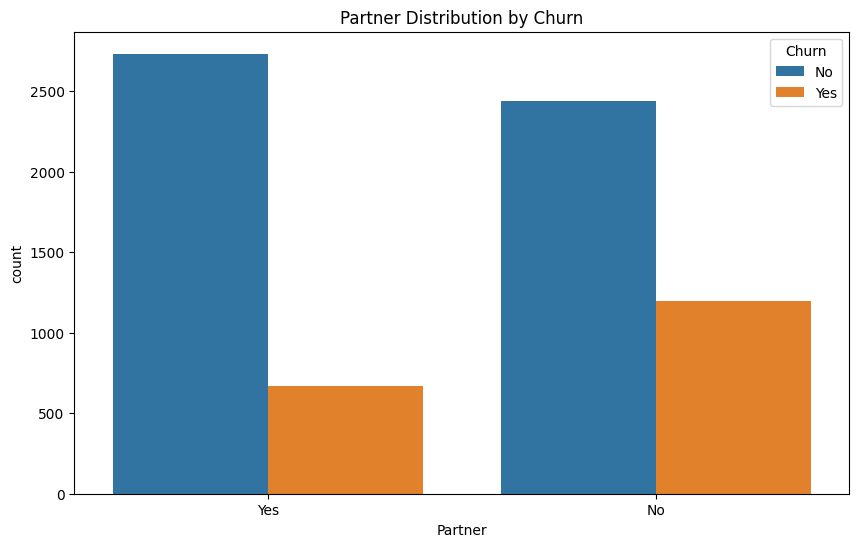

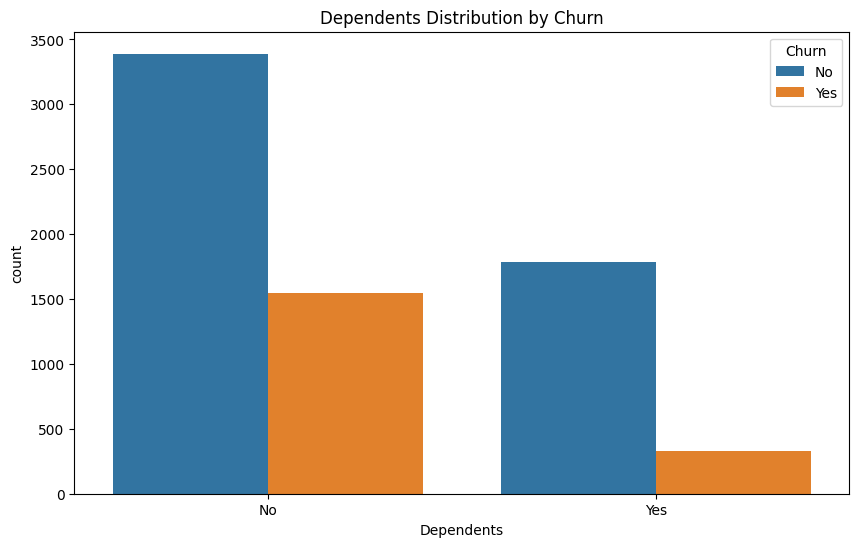

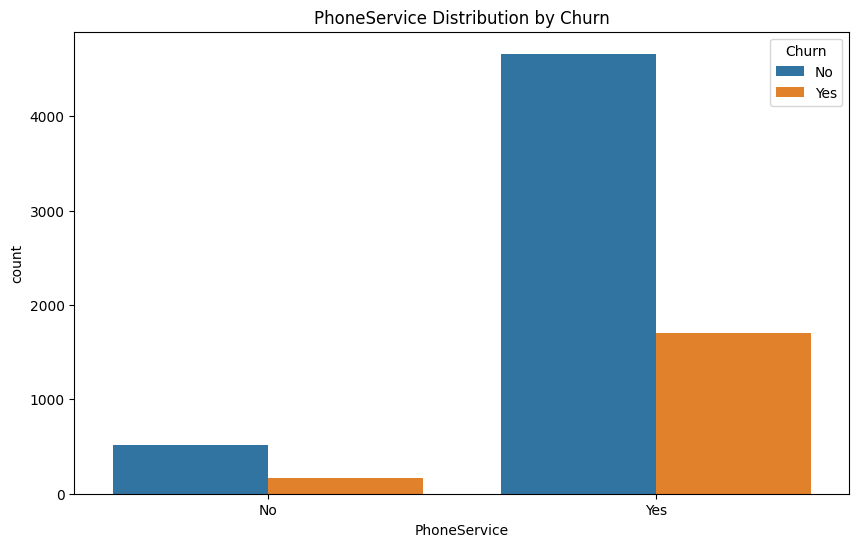

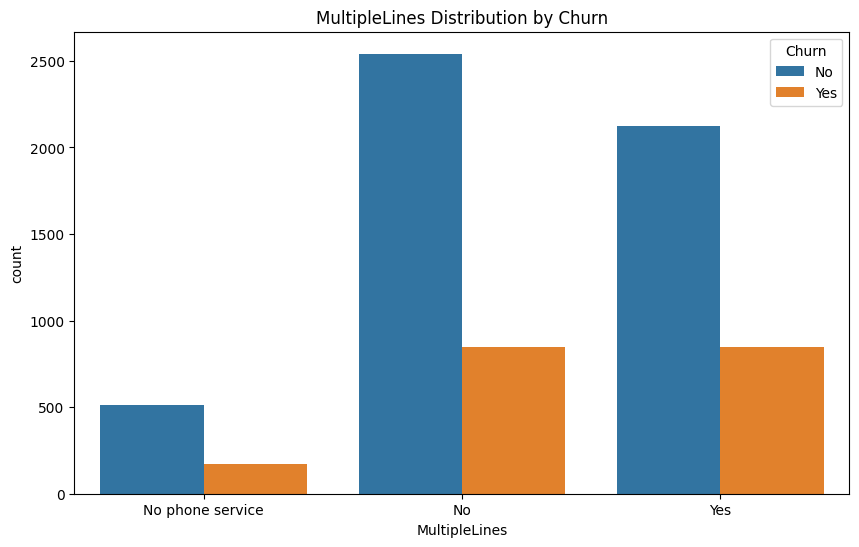

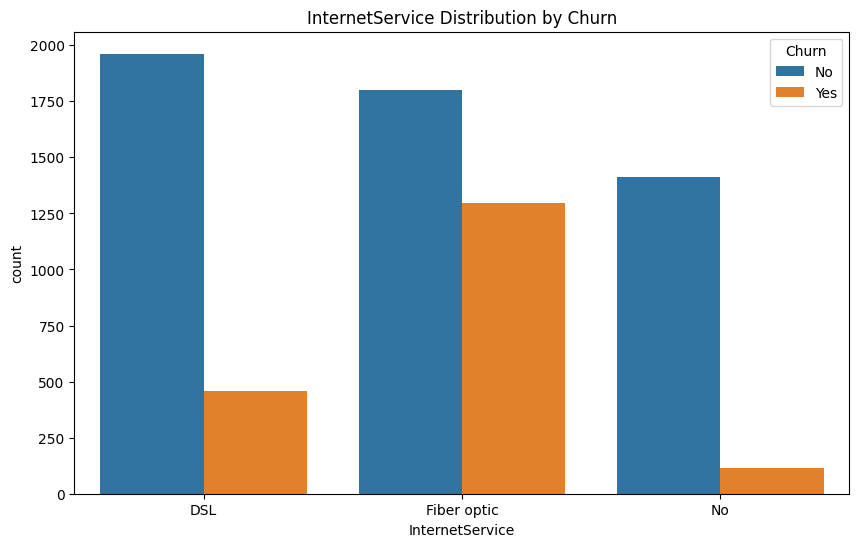

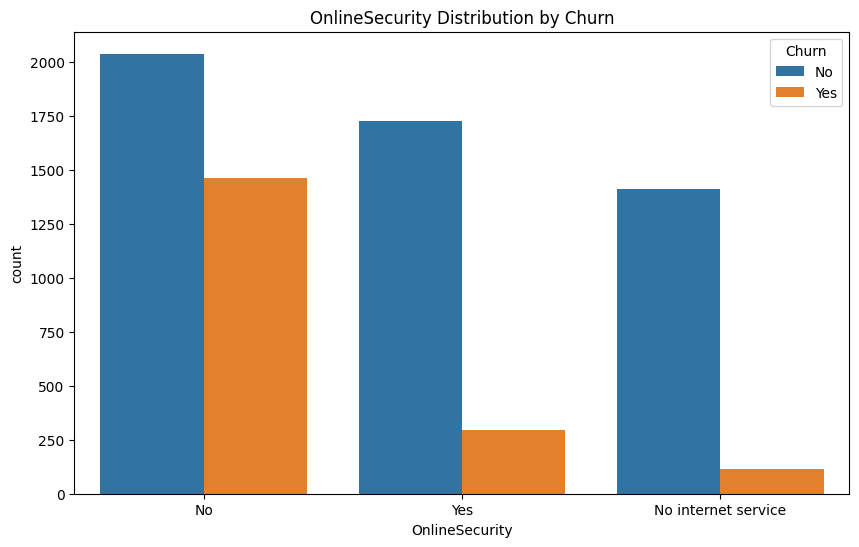

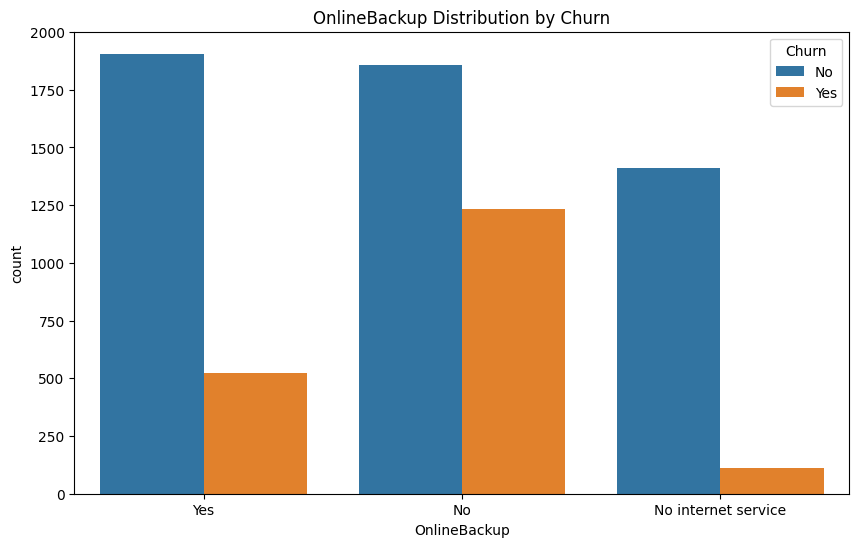

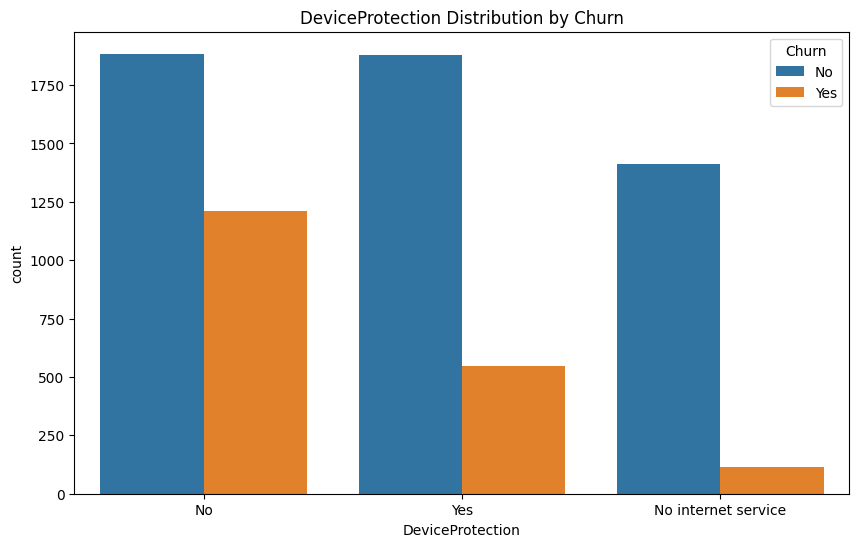

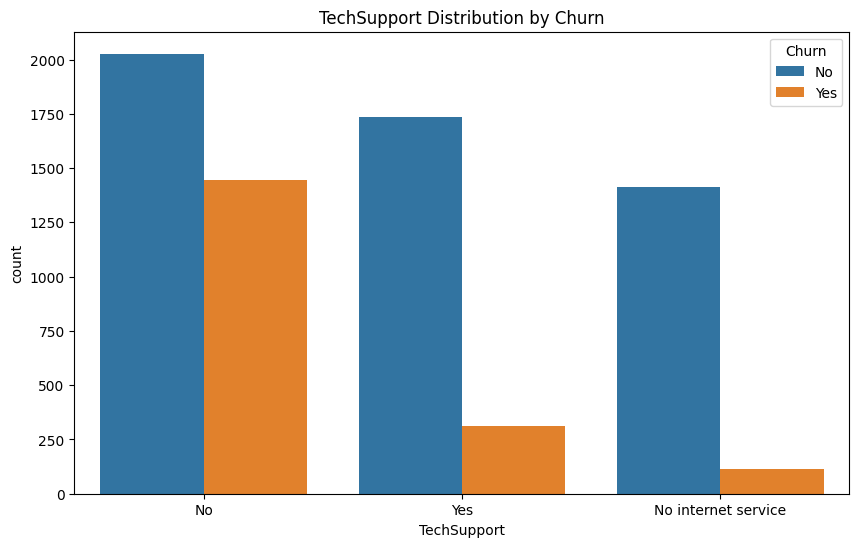

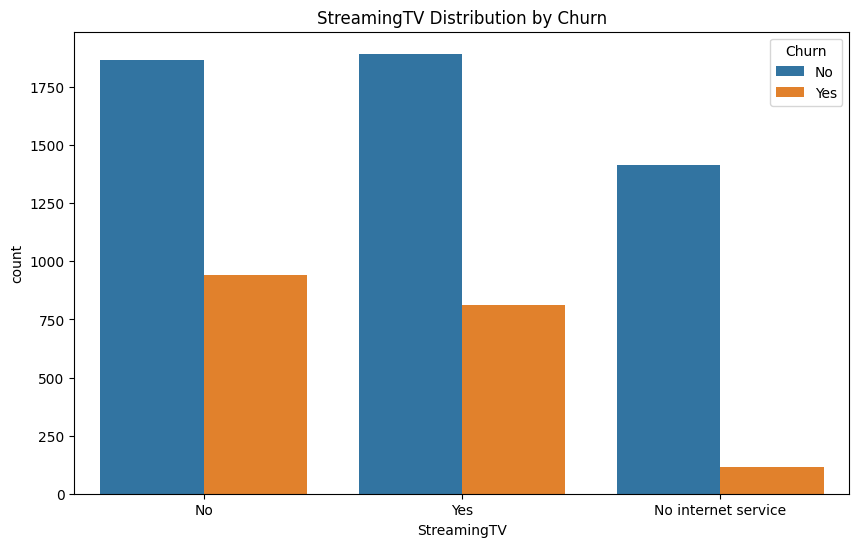

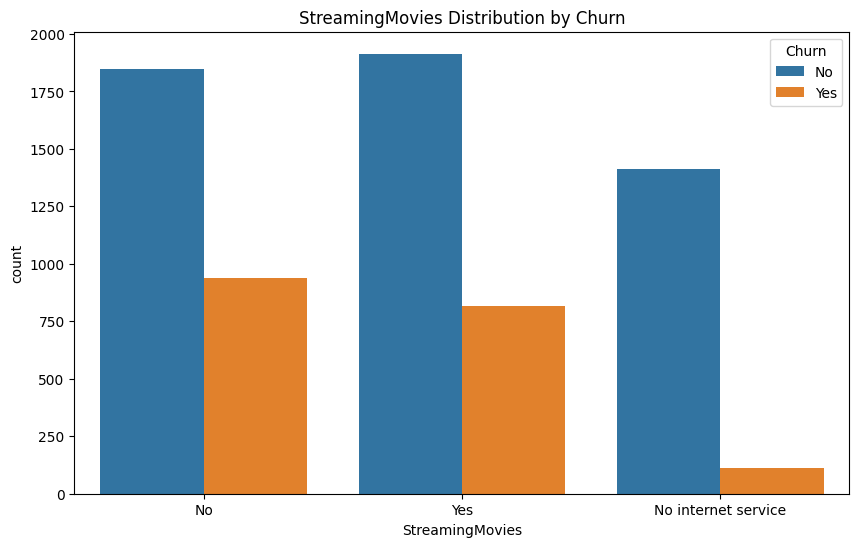

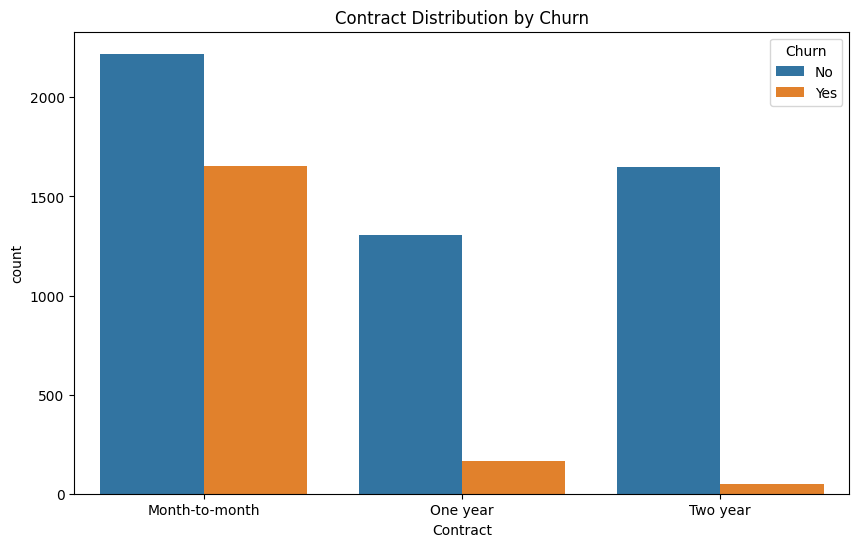

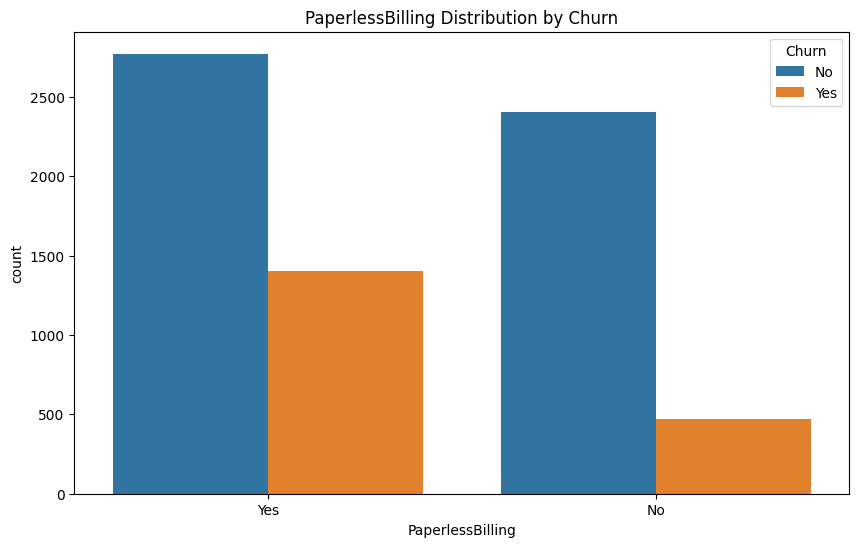

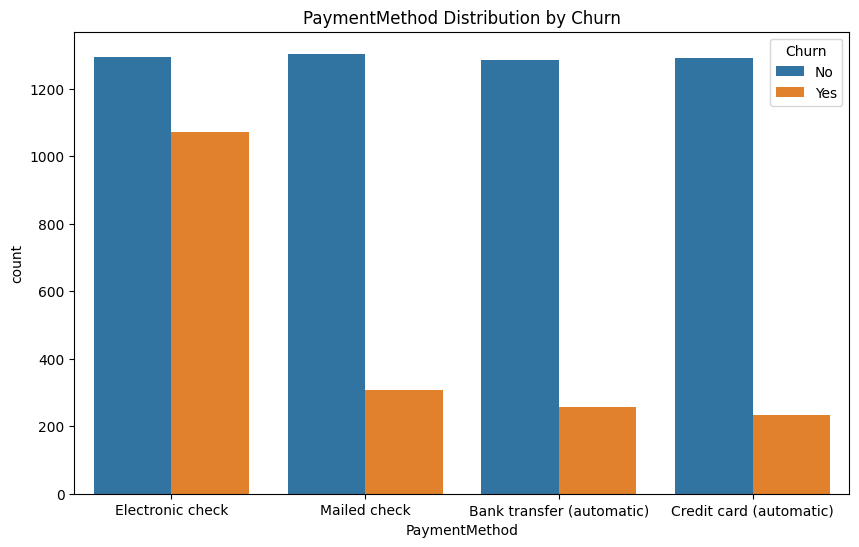

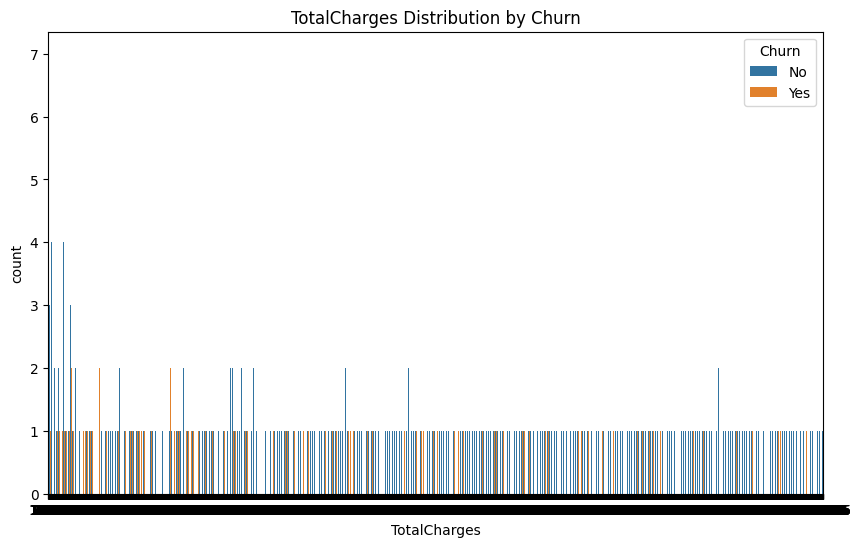

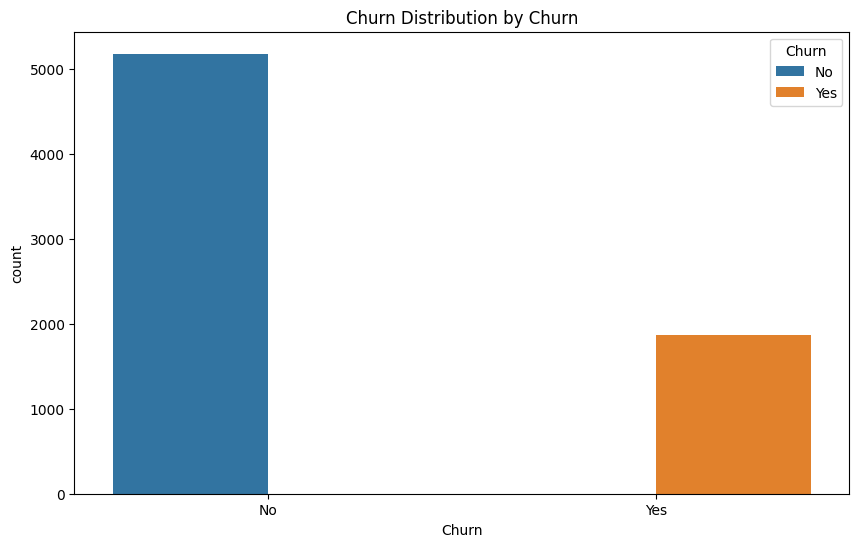

In [101]:
# Plot categorical features distribution based on Churn
for col in categorical_column:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} Distribution by Churn')
    plt.show()


**MULTI_PLAYER PERCEPTRON - API**

In [ ]:
#Multi_player Perceptron model using functional API
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight

In [ ]:
top_features

In [126]:

import pickle
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix and top_features is a list of column names
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X[top_features])
Xscaled = pd.DataFrame(Xtrain_scaled, columns=X[top_features].columns)

# Save the scaler using pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# To download the file in Google Colab
from google.colab import files

files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# Split the data into training (80%), validation (10%), and testing (10%)
Xtrain, X_temp, Ytrain, y_temp = train_test_split(Xscaled, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [70]:
#Checking if the training of the models is 10

num_features_train = Xtrain.shape[1]
print(f'Total number of features in X_train: {num_features_train}')

# Check the total number of features in X_val
num_features_val = X_val.shape[1]
print(f'Total number of features in X_val: {num_features_val}')

# Check the total number of features in X_test
num_features_test = X_test.shape[1]
print(f'Total number of features in X_test: {num_features_test}')


Total number of features in X_train: 10
Total number of features in X_val: 10
Total number of features in X_test: 10


MODEL'S ACCURACY AND AUC

In [71]:
!pip install tensorflow scikeras scikit-learn

HOSTING THE MODEL

In [72]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

In [73]:
from sklearn import metrics

In [74]:
num_classes=1
epochs=50
batch_size=10

In [133]:
import tensorflow as tf

def create_model(dropout_rate, weight_constraint, neurons, activation, num_classes, X_Corr):
    # create modeloptimizer=optimizer
    input_shape = (X_Corr.shape[1],)
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Dense((28) + neurons, activation=activation)(inputs)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense((12) + neurons, activation=activation)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense((4) + neurons, activation=activation)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense((-4) + neurons, activation=activation)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    fifth = tf.keras.layers.Dense((-12) + neurons, activation=activation)(x)

    # Add output layer with sigmoid activation
    outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(fifth)

    # Create the model
    model_optim = tf.keras.Model(inputs=inputs, outputs=outputs)
    model_optim.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model_optim


In [132]:

with open('create_model.pkl', 'wb') as file:
    pickle.dump(create_model, file)

# To download the file in Google Colab
from google.colab import files
files.download('create_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
# Comment for the model setup and grid search
from sklearn.model_selection import StratifiedKFold

# Creating a KerasClassifier with the specified parameters
model = KerasClassifier(model_optim=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# Defining hyperparameter values to search over
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]
neurons = [20]
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['relu']

# Creating a dictionary of hyperparameters
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons, model__activation=activation)

# Setting up cross-validation using StratifiedKFold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Setting up GridSearchCV with the KerasClassifier and hyperparameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy')
grid_search


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KerasClassifier(batch_size=10, epochs=50, model_optim=<function create_model at 0x7d4dc10ad1b0>, verbose=0),
             param_grid={'model__activation': ['relu'],
                         'model__dropout_rate': [0.3, 0.5],
                         'model__neurons': [20],
                         'model__weight_constraint': [3.0, 5.0]},
             scoring='accuracy')

In [77]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.9 MB/s eta 0:00:00


In [78]:
import keras_tuner

In [79]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(Xtrain.shape[1],)))

    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=4)):
        model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=96, step=32),
                             activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh'])))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

    return model

In [81]:
import keras
build_model(keras_tuner.HyperParameters())

In [82]:
# Initialize the Hyperband tuner for hyperparameter tuning
tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective='val_accuracy',
    max_epochs=100,
    factor=3,
    directory='tuning_dir',
    project_name='samples'
)


In [86]:
# Define early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

# Perform hyperparameter search with early stopping
tuner.search(Xtrain, Ytrain, epochs=30, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Print the number of features to check  if the features are 10 as selected
num_features = Xtrain.shape[1]
print(f"Number of features: {num_features}")


Trial 254 Complete [00h 00m 23s]
val_accuracy: 0.8110795617103577

Best val_accuracy So Far: 0.8238636255264282
Total elapsed time: 00h 34m 17s
Number of features: 10


In [85]:
num_features = Xtrain.shape[1]
print(f"Number of features: {num_features}")


Number of features: 10


In [87]:
tuner.results_summary()

Results summary
Results in tuning_dir/samples
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0209 summary
Hyperparameters:
num_hidden_layers: 3
units_0: 32
activation_0: relu
lr: 0.0020289738333986794
units_1: 96
activation_1: relu
units_2: 32
activation_2: relu
units_3: 64
activation_3: relu
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0203
Score: 0.8238636255264282

Trial 0208 summary
Hyperparameters:
num_hidden_layers: 2
units_0: 96
activation_0: tanh
lr: 0.0010889255589225653
units_1: 32
activation_1: relu
units_2: 32
activation_2: relu
units_3: 64
activation_3: tanh
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0206
Score: 0.8224431872367859

Trial 0231 summary
Hyperparameters:
num_hidden_layers: 3
units_0: 32
activation_0: tanh
lr: 0.0012644014045296893
units_1: 64
activation_1: tanh
units_2: 96
activation_2: relu
units_3: 64
activation_3: tanh
tuner/epochs: 34


In [88]:
best_model = tuner.get_best_models(num_models=2)[0]

In [89]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 96)                3168      
                                                                 
 dense_2 (Dense)             (None, 32)                3104      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6657 (26.00 KB)
Trainable params: 6657 (26.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Best MODEL'S ACCURACY AND AUC

In [90]:
_, accuracy = best_model.evaluate(Xtrain, Ytrain)
accuracy*100

177/177 [==============================] - 1s 2ms/step - loss: 0.3955 - accuracy: 0.8127


81.27440810203552

In [91]:
# Evaluate the model on the test set
_, test_accuracy = best_model.evaluate(X_test, y_test)
test_accuracy*100

23/23 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8057


80.56737780570984

In [127]:
# Evaluate the AUC Score on the test set
from sklearn.metrics import roc_auc_score

test_preds = best_model.predict(X_test)
test_preds_binary = (test_preds > 0.5).astype(int)
auc = roc_auc_score(y_test, test_preds_binary)

print(f"Final AUC Score: {auc:.2f}")

23/23 [==============================] - 0s 2ms/step
Final AUC Score: 0.73


In [93]:
#Saving the model
# Save the model to a file
import pickle
pickle_out=open("best_model.pkl","wb")
pickle.dump(best_model, pickle_out)
pickle_out.close()


In [ ]:
# List all installed packages and their versions
!pip list
